In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import re
print(pd.__version__)
print(np.__version__)

0.24.2
1.16.2


In [2]:
# 크롤링해 온 국민청원 데이터를 판다스를 통해 읽어온다.
petitions = pd.read_csv('petition.csv',
                        parse_dates=['start', 'end'])
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(377756, 8)

In [3]:
df=petitions

In [4]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [5]:
df.shape

(377756, 8)

In [6]:
df.isnull().values.any()

True

In [7]:
df=df.dropna()

In [8]:
df.shape

(377755, 8)

In [9]:
# 전체 데이터 중 투표가 500건 이상인 데이터를 기준으로 가져옵니다. 
# 아웃라이어 데이터 제거를 위해 20만건 이상 데이터도 제거합니다.
petition_remove_outlier = df.loc[(df['votes'] < 200)&(df['category']=='정치개혁')]
petition_remove_outlier.shape

(57879, 8)

In [10]:
df = petition_remove_outlier.copy()

In [11]:
df.describe()

,article_id,answered,votes
count,57879.000000,57879.0,57879.000000
mean,215915.564298,0.0,14.885347
std,146113.207060,0.0,25.747302
min,27.000000,0.0,0.000000
25%,82545.500000,0.0,1.000000
50%,197822.000000,0.0,6.000000
75%,336344.500000,0.0,16.000000
max,492042.000000,0.0,199.000000


In [12]:
# 기본값을 0으로 세팅, 새로운 컬럼 생성
df['votes_pos_neg'] = 0

In [13]:
# 평균 투표수를 구해 옵니다.
votes_mean = df['votes'].mean()
votes_mean

14.885347017052817

In [19]:
# 투표수가 0을 넘으면 1로 다시 세팅합니다.
df['votes_pos_neg'] = (df['votes'] > 100) == 1

In [20]:
df['votes_pos_neg'].dtypes

dtype('bool')

In [21]:
# 타입을 boolean 에서 int로 변경해 줍니다.
df['votes_pos_neg'] = df['votes_pos_neg'].astype(int)

In [22]:
df[['votes', 'votes_pos_neg']].head()

,votes,votes_pos_neg
6,1,0
96,20,0
156,5,0
225,11,0
257,1,0


In [23]:
df

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg
6,27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...,0
96,120,2017-08-20,2017-11-18,0,20,정치개혁,여론조작 처벌 도입과 무거운 형량을 원합니다,달빛기사단 문꿀오소리 이런 집단이 좌표찍고 자신들 입맛에 맞지않는 기사 댓글들을 비...,0
156,180,2017-08-21,2017-11-19,0,5,정치개혁,내 제안 건의를 대통령이 직접 답변해 주세요.,"1. 대통령이 직접 답변준다고 해서 그대로 믿었습니다.\n그런데, 접수대기로 접수조...",0
225,250,2017-08-22,2017-11-20,0,11,정치개혁,청소년 참정권을 보장해주십시오!,청소년 참정권을 보장해주십시오!\n현재 대한민국은 세계 95% 가까운 국가에서 선거...,0
257,282,2017-08-22,2017-11-20,0,1,정치개혁,정부의 정책의 명확한 기준을 만들어주세요,"안녕하세요.\n밝은 미래를 바라보며, 살아가는 대한민국의 국민입니다.\n새정부의 정...",0
368,395,2017-08-24,2017-08-31,0,0,정치개혁,"만 18세 투표권, 만 19세 정치 출마 제안",안녕하세요! 저는 서울에 위치한 고등학생입니다.\n저는 만 18세 투표권을 제안하고...,0
406,434,2017-08-24,2017-09-23,0,38,정치개혁,생존권 위협하는 집합건물법 개정이 필요합니다,1인가구가 늘어나고 있는 이 시대에 주거용 오피스텔 관련법인 집합건물법에는 문제가 ...,0
445,473,2017-08-24,2017-08-31,0,0,정치개혁,문재인 대통령 나으리... 청와대에 강도질 좀 해도 되겠습니까?,교통사고는 건강보험 수가체계를 따르도록 되어 있어\n합의를 하지 않으면 치료조차 받...,0
531,559,2017-08-25,2017-09-24,0,0,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.,존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0
532,560,2017-08-25,2017-09-24,0,2,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.(수정안..),존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0


In [24]:
type(df["content"])

pandas.core.series.Series

In [25]:
type(df["content"][2])

KeyError: 2

In [ ]:
len(df["content"][44])

In [26]:
df["content_len"]=0

In [27]:
df.shape

(57879, 10)

In [28]:
%time
for index in df.index:
    df["content_len"][index]=len(df["content"][index])

Wall time: 0 ns


C:\Users\hyunho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_len
6,27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...,0,1326
96,120,2017-08-20,2017-11-18,0,20,정치개혁,여론조작 처벌 도입과 무거운 형량을 원합니다,달빛기사단 문꿀오소리 이런 집단이 좌표찍고 자신들 입맛에 맞지않는 기사 댓글들을 비...,0,428
156,180,2017-08-21,2017-11-19,0,5,정치개혁,내 제안 건의를 대통령이 직접 답변해 주세요.,"1. 대통령이 직접 답변준다고 해서 그대로 믿었습니다.\n그런데, 접수대기로 접수조...",0,2189
225,250,2017-08-22,2017-11-20,0,11,정치개혁,청소년 참정권을 보장해주십시오!,청소년 참정권을 보장해주십시오!\n현재 대한민국은 세계 95% 가까운 국가에서 선거...,0,711
257,282,2017-08-22,2017-11-20,0,1,정치개혁,정부의 정책의 명확한 기준을 만들어주세요,"안녕하세요.\n밝은 미래를 바라보며, 살아가는 대한민국의 국민입니다.\n새정부의 정...",0,507
368,395,2017-08-24,2017-08-31,0,0,정치개혁,"만 18세 투표권, 만 19세 정치 출마 제안",안녕하세요! 저는 서울에 위치한 고등학생입니다.\n저는 만 18세 투표권을 제안하고...,0,333
406,434,2017-08-24,2017-09-23,0,38,정치개혁,생존권 위협하는 집합건물법 개정이 필요합니다,1인가구가 늘어나고 있는 이 시대에 주거용 오피스텔 관련법인 집합건물법에는 문제가 ...,0,364
445,473,2017-08-24,2017-08-31,0,0,정치개혁,문재인 대통령 나으리... 청와대에 강도질 좀 해도 되겠습니까?,교통사고는 건강보험 수가체계를 따르도록 되어 있어\n합의를 하지 않으면 치료조차 받...,0,654
531,559,2017-08-25,2017-09-24,0,0,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.,존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0,1808
532,560,2017-08-25,2017-09-24,0,2,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.(수정안..),존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0,1843


In [30]:
df["content_len"]

6         1326
96         428
156       2189
225        711
257        507
368        333
406        364
445        654
531       1808
532       1843
577       1739
578       1739
614       1620
635        618
702        431
828       1691
872       2992
875        914
887        596
980       1297
1035       925
1079       522
1173        42
1174       303
1175       145
1180       196
1181        99
1232      3583
1267       281
1271       373
          ... 
377599     177
377607     464
377610      33
377620      31
377621      25
377623     160
377626     199
377634     262
377639      44
377642     111
377646     237
377648     464
377649    1011
377651     219
377654     190
377663     319
377684     267
377706     454
377715     240
377720     774
377728     184
377731      40
377733     230
377734     842
377745    1950
377748     375
377749     108
377750     115
377752     287
377754     115
Name: content_len, Length: 57879, dtype: int64

In [31]:
#df.to_csv("petition_content_length.csv", mode='w')

In [32]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content', 'votes_pos_neg', 'content_len'],
      dtype='object')

In [33]:
df["content_len"].mean()

371.64819710084834

In [34]:
len(df.loc[df["content_len"]>df["content_len"].mean()])

14897

In [35]:
len(df.loc[df["votes_pos_neg"]==1])

1312

In [36]:
# 본문 내용 길이가 평균 넘고 투표수가 100표 이상인거
len(df.loc[(df["content_len"]>df["content_len"].mean())&(df["votes_pos_neg"]==1)])

404

In [37]:
# 득표수 100 넘는것중 내용길이가 평균 넘긴 비율
len(df.loc[(df["content_len"]>df["content_len"].mean())&(df["votes_pos_neg"]==1)])/len(df.loc[df["votes_pos_neg"]==1])*100

30.79268292682927

In [38]:
# 득표수 0인것 중 내용길이가 평균 넘긴 비율
len(df.loc[(df["content_len"]>df["content_len"].mean())&(df["votes_pos_neg"]==0)])/len(df.loc[df["votes_pos_neg"]==0])*100

25.620945073983066

In [39]:
# 득표수 100이상의 내용 평균
df.loc[df["votes_pos_neg"]==1]["content_len"].mean()

417.8498475609756

In [40]:
# 득표수 0의 내용 평균
df.loc[df["votes_pos_neg"]==0]["content_len"].mean()

370.5766082698393

In [41]:
# 득표수 101의 내용 평균
df.loc[df["votes"]==101]["content_len"].mean()

813.25

In [42]:
# 득표수 102의 내용 평균
df.loc[df["votes"]==102]["content_len"].mean()

525.45

In [43]:
# 득표수 103의 내용 평균
df.loc[df["votes"]==103]["content_len"].mean()

751.3225806451613

In [44]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content', 'votes_pos_neg', 'content_len'],
      dtype='object')

In [45]:
df["votes"].max()

199

In [46]:
df.loc[df["votes"]>100].min()

article_id                                                    1623
start                                          2017-09-02 00:00:00
end                                            2017-10-21 00:00:00
answered                                                         0
votes                                                          101
category                                                      정치개혁
title            "난민신청" 우리나라 밖에서 신청하도록 "법개정", 벌써, 난민신청자는 대한민국밖에...
content          "사람이 아닌 국민이 대접받는 위대한 대한민국 건설을 위해!!!!!"\n문재인대통령...
votes_pos_neg                                                    1
content_len                                                      3
dtype: object

In [47]:
x=range(0,1000)

In [48]:
y=[df.loc[df["votes"]==v]["content_len"].mean() for v in x]

In [49]:
import matplotlib.pyplot as plt

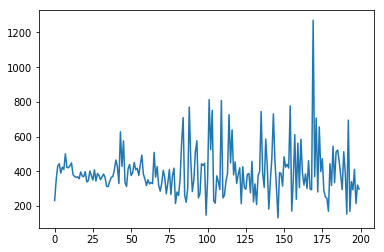

In [50]:
plt.plot(x,y)

In [51]:
df

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_len
6,27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...,0,1326
96,120,2017-08-20,2017-11-18,0,20,정치개혁,여론조작 처벌 도입과 무거운 형량을 원합니다,달빛기사단 문꿀오소리 이런 집단이 좌표찍고 자신들 입맛에 맞지않는 기사 댓글들을 비...,0,428
156,180,2017-08-21,2017-11-19,0,5,정치개혁,내 제안 건의를 대통령이 직접 답변해 주세요.,"1. 대통령이 직접 답변준다고 해서 그대로 믿었습니다.\n그런데, 접수대기로 접수조...",0,2189
225,250,2017-08-22,2017-11-20,0,11,정치개혁,청소년 참정권을 보장해주십시오!,청소년 참정권을 보장해주십시오!\n현재 대한민국은 세계 95% 가까운 국가에서 선거...,0,711
257,282,2017-08-22,2017-11-20,0,1,정치개혁,정부의 정책의 명확한 기준을 만들어주세요,"안녕하세요.\n밝은 미래를 바라보며, 살아가는 대한민국의 국민입니다.\n새정부의 정...",0,507
368,395,2017-08-24,2017-08-31,0,0,정치개혁,"만 18세 투표권, 만 19세 정치 출마 제안",안녕하세요! 저는 서울에 위치한 고등학생입니다.\n저는 만 18세 투표권을 제안하고...,0,333
406,434,2017-08-24,2017-09-23,0,38,정치개혁,생존권 위협하는 집합건물법 개정이 필요합니다,1인가구가 늘어나고 있는 이 시대에 주거용 오피스텔 관련법인 집합건물법에는 문제가 ...,0,364
445,473,2017-08-24,2017-08-31,0,0,정치개혁,문재인 대통령 나으리... 청와대에 강도질 좀 해도 되겠습니까?,교통사고는 건강보험 수가체계를 따르도록 되어 있어\n합의를 하지 않으면 치료조차 받...,0,654
531,559,2017-08-25,2017-09-24,0,0,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.,존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0,1808
532,560,2017-08-25,2017-09-24,0,2,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.(수정안..),존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0,1843


In [52]:
# df 저장
df.to_csv("petition_content_len.csv", header=True, index=False)

In [100]:
# df 가져오기
df = pd.read_csv('petition_content_len.csv' )

In [101]:
df

,article_id,start,end,answered,votes,category,title,content,votes_pos_neg,content_len
0,27,2017-08-19,2017-09-18,0,1,정치개혁,김이수 헌재소장 임명 재고 건의,문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...,0,1326
1,120,2017-08-20,2017-11-18,0,20,정치개혁,여론조작 처벌 도입과 무거운 형량을 원합니다,달빛기사단 문꿀오소리 이런 집단이 좌표찍고 자신들 입맛에 맞지않는 기사 댓글들을 비...,0,428
2,180,2017-08-21,2017-11-19,0,5,정치개혁,내 제안 건의를 대통령이 직접 답변해 주세요.,"1. 대통령이 직접 답변준다고 해서 그대로 믿었습니다.\n그런데, 접수대기로 접수조...",0,2189
3,250,2017-08-22,2017-11-20,0,11,정치개혁,청소년 참정권을 보장해주십시오!,청소년 참정권을 보장해주십시오!\n현재 대한민국은 세계 95% 가까운 국가에서 선거...,0,711
4,282,2017-08-22,2017-11-20,0,1,정치개혁,정부의 정책의 명확한 기준을 만들어주세요,"안녕하세요.\n밝은 미래를 바라보며, 살아가는 대한민국의 국민입니다.\n새정부의 정...",0,507
5,395,2017-08-24,2017-08-31,0,0,정치개혁,"만 18세 투표권, 만 19세 정치 출마 제안",안녕하세요! 저는 서울에 위치한 고등학생입니다.\n저는 만 18세 투표권을 제안하고...,0,333
6,434,2017-08-24,2017-09-23,0,38,정치개혁,생존권 위협하는 집합건물법 개정이 필요합니다,1인가구가 늘어나고 있는 이 시대에 주거용 오피스텔 관련법인 집합건물법에는 문제가 ...,0,364
7,473,2017-08-24,2017-08-31,0,0,정치개혁,문재인 대통령 나으리... 청와대에 강도질 좀 해도 되겠습니까?,교통사고는 건강보험 수가체계를 따르도록 되어 있어\n합의를 하지 않으면 치료조차 받...,0,654
8,559,2017-08-25,2017-09-24,0,0,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.,존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0,1808
9,560,2017-08-25,2017-09-24,0,2,정치개혁,문재인 대통령님께 드리는 편지 및 이상적인 제안.(수정안..),존경하는 문재인 대통령님께\n언제 대통령님께 편지를 써보나 하고 기다리고\n또 기다...,0,1843


In [103]:
df["votes"].max()

199

In [104]:
df_len=DataFrame()

In [105]:
df_len

""


In [106]:
x=range(0,200)
[df.loc[df["votes"]==v]["content_len"].mean() for v in x]

[231.93066023515226,
 351.3368243243243,
 430.7069866920152,
 444.3056133056133,
 390.1250437828371,
 424.28657074340526,
 411.0619180633147,
 500.78149920255186,
 423.321630804077,
 420.8452685421995,
 433.2711111111111,
 448.6292887029289,
 381.14617368873604,
 370.41030723488603,
 365.05041152263374,
 368.92740046838406,
 357.2007255139057,
 397.03534031413614,
 373.3110119047619,
 369.4367816091954,
 397.88521739130437,
 338.78890876565293,
 346.4953095684803,
 402.2234273318872,
 376.40515222482435,
 349.75401069518716,
 408.8810198300283,
 344.4511494252874,
 388.4245810055866,
 375.8676923076923,
 352.01374570446734,
 368.8205128205128,
 384.53472222222223,
 363.21011673151753,
 312.57081545064375,
 313.61928934010155,
 342.4675925925926,
 366.44600938967136,
 369.1393034825871,
 406.9247311827957,
 465.4421768707483,
 428.3706293706294,
 330.0699300699301,
 627.5466666666666,
 428.78472222222223,
 575.2483660130719,
 335.53731343283584,
 313.0071942446043,
 414.6639344262295,
 

In [107]:
df_len_votes=[]
for i in range(0,200):
    df_len_votes.append(i)

In [108]:
df_len_mean_len=[]
df_len_mean_len=[df.loc[df["votes"]==v]["content_len"].mean() for v in x]

In [109]:
df_len["votes"]=df_len_votes
df_len["mean_length"]=df_len_mean_len

In [110]:
df_len=df_len.dropna()

In [111]:
df_len

,votes,mean_length
0,0,231.930660
1,1,351.336824
2,2,430.706987
3,3,444.305613
4,4,390.125044
5,5,424.286571
6,6,411.061918
7,7,500.781499
8,8,423.321631
9,9,420.845269


In [112]:
from plotnine import *

In [113]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

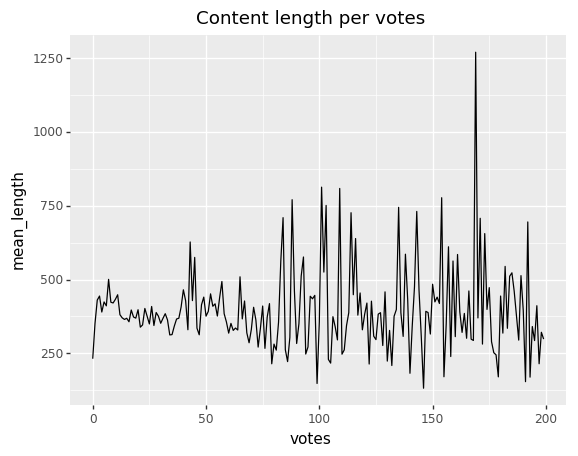

<ggplot: (138875658262)>

In [114]:
ggplot(df_len, aes(x='votes', y='mean_length'))+geom_line()+ggtitle('Content length per votes')